<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/heat-exchangers/ideal-exchangers-simulation/sim_parallel_flow_heat_exchanger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parallel Flow Heat Exchanger

The concept is as follows:
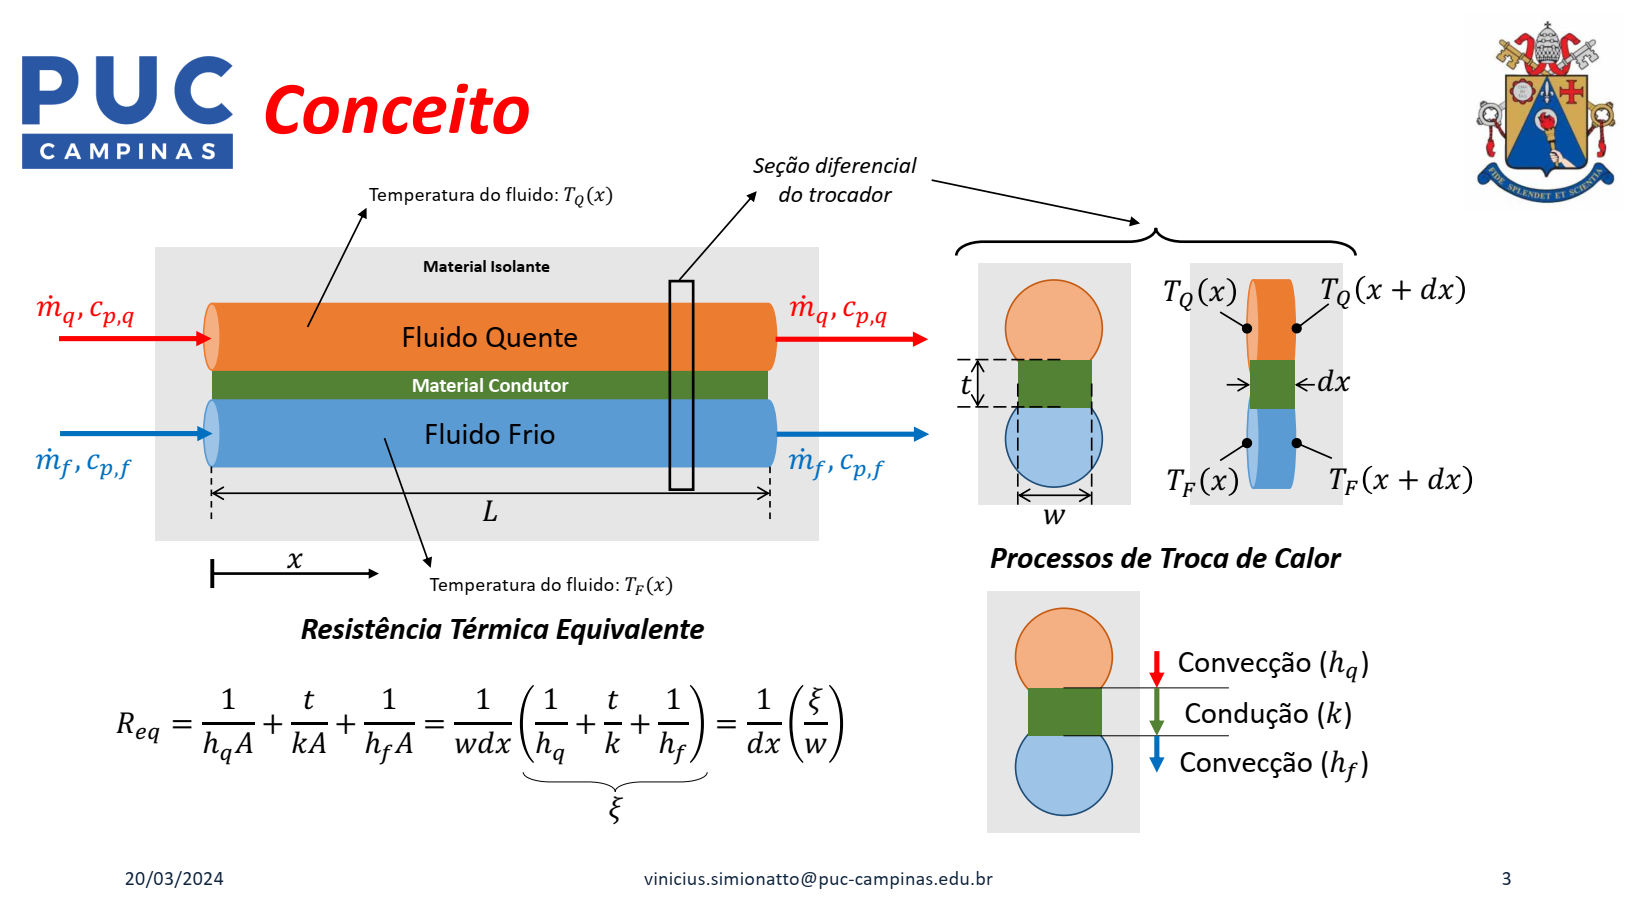

The temperatures in the hot and cold pipes are given by $T_Q(x)$ and $T_F(x)$, respectively.

The system operates in steady state and the temperatures are measured along the $x$-axis.

The ODEs that describe this system are:

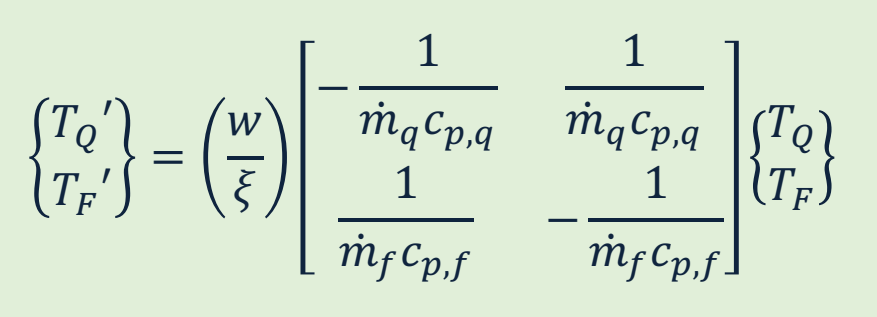

And the solution for the temperatures is given by:

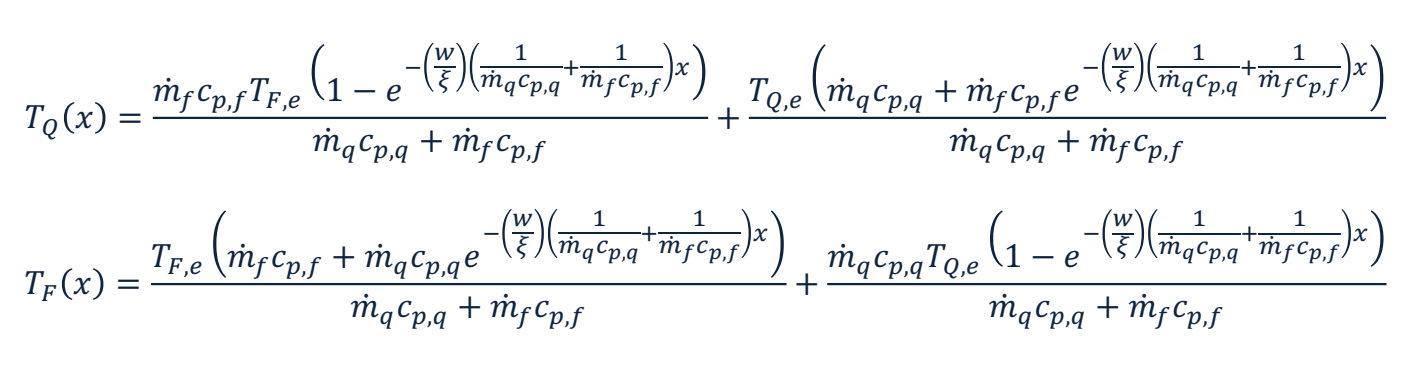

, where $T_{Q,e}$ and $T_{F,e}$ are the temperatures of the hot and cold fluid when entering the heat exchanger, respectively.

Once the specific heats ($c_p$) are used to calculate the temperature variation of the fluid, this model doesn't account for phase changing fluids.

# Simulating the behavior of the heat exchanger

Fill the data in the Python code below to simulate the behavior of such a heat exchanger.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fill in all the necessary data in this script

dmf = 1      # kg/s        -> This is the mass flow rate of the cold fluid
dmq = 2      # kg/s        -> This is the mass flow rate of the hot fluid
cp_f = 1000  # J/kg.K      -> This is the specific heat for the cold fluid
cp_q = 1200  # J/kg.K      -> This is the specific heat for the hot fluid
tfe = 20     # °C or K     -> Temperature of the cold fluid at entrance
tqe = 100    # Same as tfe -> Temperature of the cold fluid at entrance

U = 1000     # W/m^2.K     -> Overall Heat Exchange Coefficient
A = 2.5      # m^2         -> Heat exchange area
L = 1.0      # m           -> Heat exchanger length

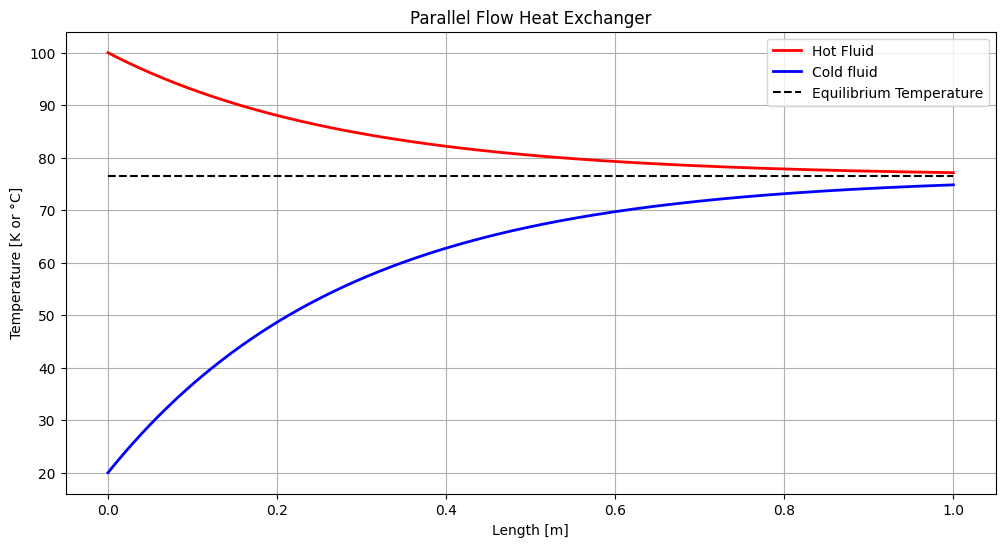

In [5]:
# Do not edit this script (unless you know pretty well what you are doing)

x = np.linspace(0, L, 1000)

lda = -(U*A/L)*(1/(dmq*cp_q)+1/(dmf*cp_f))

TQ = dmf*cp_f*tfe*(1-np.exp(lda*x))/(dmq*cp_q + dmf*cp_f) + \
     tqe*(dmq*cp_q + dmf*cp_f*np.exp(lda*x))/(dmq*cp_q + dmf*cp_f)

TF = dmq*cp_q*tqe*(1-np.exp(lda*x))/(dmq*cp_q + dmf*cp_f) + \
     tfe*(dmf*cp_f + dmq*cp_q*np.exp(lda*x))/(dmq*cp_q + dmf*cp_f)

Tbal = (dmf*cp_f*tfe + dmq*cp_q*tqe)/(dmq*cp_q + dmf*cp_f)

dqdx = (U*A/L)*(TQ - TF)


plt.figure(figsize=(12,6))
plt.plot(x,TQ, 'r', linewidth=2, label="Hot Fluid")
plt.plot(x,TF, 'b', linewidth=2, label="Cold fluid")
plt.plot([0, L], [Tbal, Tbal], 'k--', label="Equilibrium Temperature")
plt.legend()
plt.xlabel('Length [m]')
plt.ylabel('Temperature [K or °C]')
plt.title('Parallel Flow Heat Exchanger')
plt.grid()
plt.show()


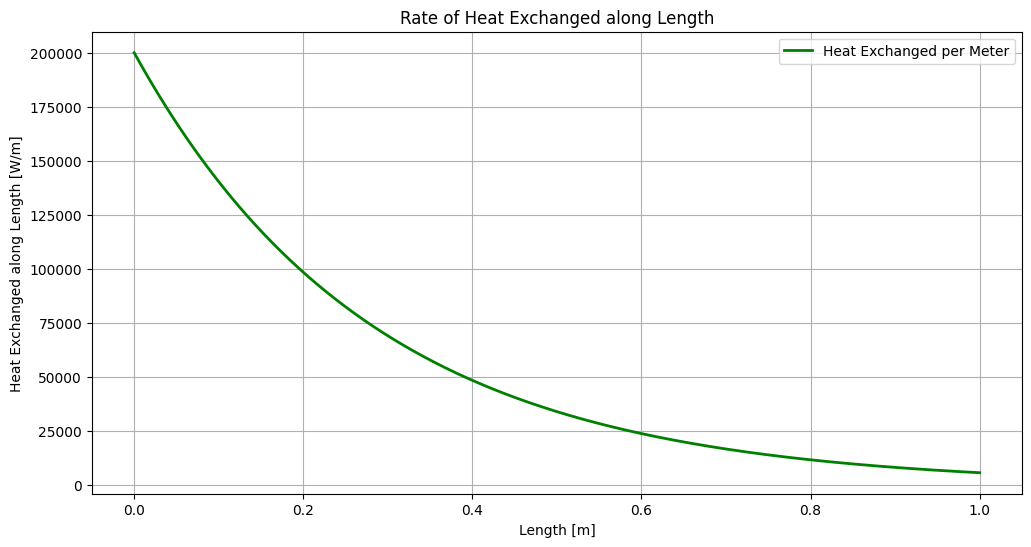

In [6]:
plt.figure(figsize=(12,6))
plt.plot(x,dqdx, 'g', linewidth=2, label="Heat Exchanged per Meter")
plt.legend()
plt.xlabel('Length [m]')
plt.ylabel('Heat Exchanged along Length [W/m]')
plt.title('Rate of Heat Exchanged along Length')
plt.grid()
plt.show()